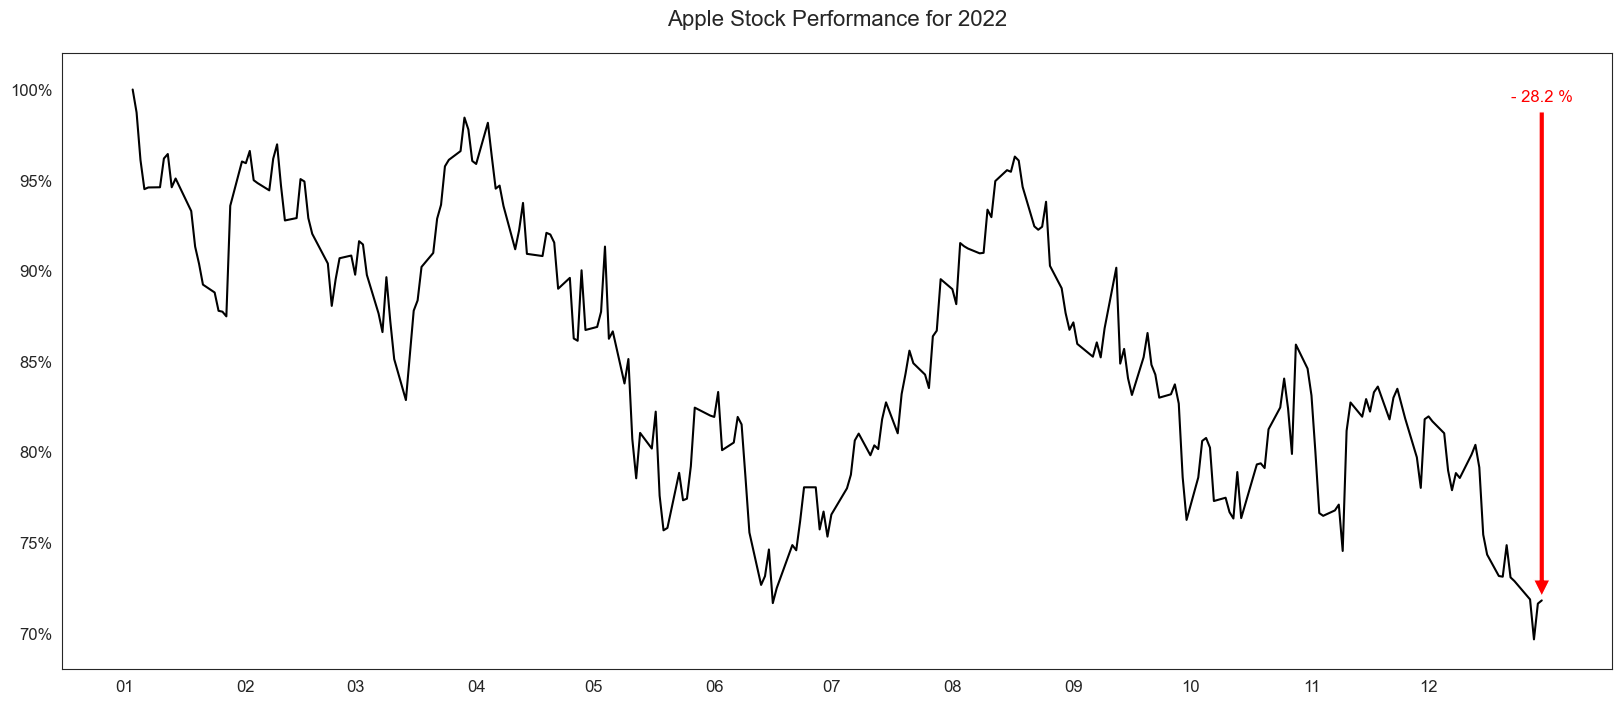

In [10]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import matplotlib.font_manager as fm
from matplotlib import rcParams
import seaborn as sns
import matplotlib.dates as mdates
sns.set_style("white")

# Set the font
font = 'sans-serif'  
rcParams['font.family'] = font
rcParams['font.size'] = 12

# Define the ticker symbol
tickerSymbol = 'AAPL'

# Download the data from Yahoo Finance
data = yf.download(tickerSymbol, start="2022-01-01", end="2023-01-01", progress=False)

# Select the Adjusted Close prices
prices = data["Adj Close"]

data = pd.DataFrame(prices, index=prices.index, columns=["Adj Close"])

# Normalize the prices to start at 100
normalized_prices = (data["Adj Close"] / data["Adj Close"].iloc[0]) * 100

# Plot the normalized prices
plt.figure(figsize=(20, 8))
plt.plot(normalized_prices, color="Black")

# Format the y-axis ticks to show percentages without commas
class PercentFormatterNoCommas(mticker.PercentFormatter):
    def __call__(self, x, pos=None):
        return '{:.0f}%'.format(x)

# Format the y-axis ticks to show percentages
plt.gca().yaxis.set_major_formatter(PercentFormatterNoCommas())

# Set x-axis to display only the month number (without the day)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Create a custom formatter function
def custom_formatter(x, pos):
    date_num = mdates.num2date(x)
    if date_num.strftime('%m') == '01' and date_num.year == normalized_prices.index[-1].year + 1:
        return ''
    else:
        return date_num.strftime('%m')

plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(custom_formatter))

arrow_props = dict(facecolor='red', shrink=0.008)

plt.annotate('- 28.2 %', xy=(prices.index[-1], normalized_prices.iloc[-1]), 
             xytext=(prices.index[-1], 100), 
             arrowprops=arrow_props, 
             ha='center', 
             va='top',
             color="red")

plt.title("Apple Stock Performance for 2022", fontsize = 16,pad=20)

# Remove the x-axis label
plt.xlabel("")
plt.ylim(68, 102)

plt.show()